Solution to exercise 2.5 implement reverse Cuthill-McKee algorithm

In [26]:
import numpy as np
import networkx as nx
import scipy.sparse as sparse
from numpy import ndarray
from matplotlib import pyplot as plt

In [27]:
def FindRowValsOffDiagonal(matrix: ndarray):
    rowValues = []
    for i in range(len(matrix)):
        degree = 0
        for j in range(len(matrix[i])):
            if matrix[i, j] != 0 and i != j:
                degree += 1
        rowValues.append(degree)
    return rowValues

In [28]:
def BFSRowValues(matrix: ndarray):
    rowValues = FindRowValsOffDiagonal(matrix=matrix)
    size = matrix.shape[0]
    newValues = []
    
    while len(newValues) < size:
        minIndex = rowValues.index(min(rowValues))
        newValues.append(minIndex)
        rowValues[minIndex] = float('inf')
        for i in range(len(matrix[minIndex])):
            if matrix[minIndex, i] != 0 and minIndex != i and not newValues.__contains__(i):
                newValues.append(i)
                rowValues[i] = float('inf')
                
    return newValues

In [29]:
# Solution to 2.5
def ReverseCuthillMckee(matrix: ndarray):
    # BFS to reorder "vertices"
    newValues = BFSRowValues(matrix=matrix)

    # Permute matrix according to BFS
    bandedMatrix = np.zeros(matrix.shape)
    for i in range(len(bandedMatrix)):
        for j in range(len(bandedMatrix[i])):
            bandedMatrix[i][j] = matrix[newValues[i], newValues[j]]
    
    
    return bandedMatrix
    

In [30]:
# Create random sparse symmetric matrix
matrix = sparse.random(6, 6, .6)
matrixSymm = matrix.A.T * matrix.A
print(matrixSymm)

[[0.         0.         0.1420769  0.         0.50905142 0.        ]
 [0.         0.26193929 0.         0.01169088 0.         0.        ]
 [0.1420769  0.         0.6591952  0.372141   0.         0.        ]
 [0.         0.01169088 0.372141   0.55575778 0.         0.03686414]
 [0.50905142 0.         0.         0.         0.         0.32828414]
 [0.         0.         0.         0.03686414 0.32828414 0.        ]]


In [31]:
# run the algorithm with the example matrix
print(ReverseCuthillMckee(matrix=matrixSymm))

[[0.26193929 0.01169088 0.         0.         0.         0.        ]
 [0.01169088 0.55575778 0.         0.372141   0.         0.03686414]
 [0.         0.         0.         0.1420769  0.50905142 0.        ]
 [0.         0.372141   0.1420769  0.6591952  0.         0.        ]
 [0.         0.         0.50905142 0.         0.         0.32828414]
 [0.         0.03686414 0.         0.         0.32828414 0.        ]]


In [32]:
# Solution to 2.6
# read graph from file
graph = nx.read_gml("dolphins.gml")

In [33]:
print(graph.nodes)
print(graph.edges)

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
[('Beak', 'Fish'), ('Beak', 'Grin'), ('Beak', 'Haecksel'), ('Beak', 'SN9'), ('Beak', 'SN96'), ('Beak', 'TR77'), ('Beescratch', 'Jet'), ('Beescratch', 'Knit'), ('Beescratch', 'Notch'), ('Beescratch', 'Number1'), ('Beescratch', 'Oscar'), ('Beescratch', 'SN100'), ('Beescratch', 'SN90'), ('Beescratch', 'Upbang'), ('Bumper', 'Fish'), ('Bumper', 'SN96'), ('Bumper', 'Thumper'), ('Bumper', 'Zipfel'), ('CCL', 'Double'), ('CCL', 'Grin'), ('CCL',

In [34]:
dolphinMatrix = nx.to_numpy_array(graph)
print(dolphinMatrix)
dolphinMatrixBanded = ReverseCuthillMckee(dolphinMatrix)
print(dolphinMatrixBanded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]
[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 1. 1. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 1. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]]


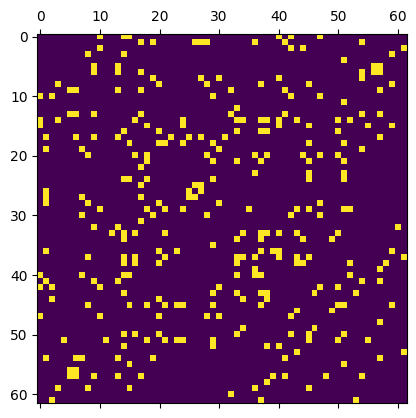

In [35]:
correlations = dolphinMatrix.data
# plot dolphin adjacency matrix before Cuthill-McKee algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
plt.show()

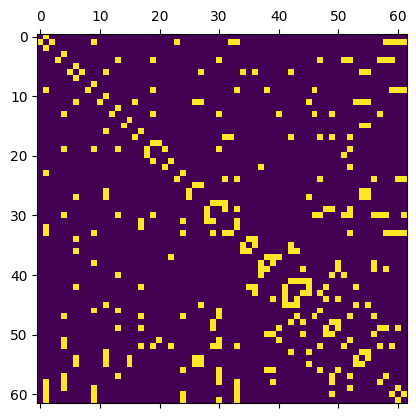

In [36]:
correlations = dolphinMatrixBanded.data
# plot dolphin adjacency matrix after Cuthill-McKee algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=0, vmax=1)
plt.show()